In [76]:
#Installare pachetti 

#!install ....


#Fai una prova su altro pc per vedere se funziona 

In [77]:
#Starter Pack
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#from matplotlib.ticker import FuncFormatter
import seaborn as sns
from scipy.stats import chi2_contingency
import requests

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# from statsmodels.tsa.seasonal import seasonal_decompose #per serie temporali

from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import os  # per interagire con il sistema operativo, eseguire operazioni sul file system e gestire variabili d'ambiente.
import warnings 
warnings.filterwarnings('ignore')

import missingno as msno
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [78]:
#Carichiamo e controlliamo i dati a nostra disposizione

test_df = pd.read_csv(r"D:\Giorgio\Code\Project_NA_DataScience-\test.csv", encoding='cp1252')

train_df = pd.read_csv(r"D:\Giorgio\Code\Project_NA_DataScience-\train.csv", encoding='cp1252')

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [80]:
test_df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [82]:
train_df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [83]:
#Togliamo i valori nulli da entrambi i dataframe e assicuriamoci che non ci sinao duplicati. Una volta fatto procediamo con la concatenazione e con l'EDA. Suddivideremo Train e test successivamente con il metodo Stratifieldshffeleshift

#Pulizia test
test_df = test_df.drop_duplicates()
test_df = test_df.dropna(axis=1)

#Pulizia Train
train_df = train_df.drop_duplicates()
train_df = train_df.dropna(axis=1)

df = pd.concat([train_df, test_df])

In [84]:
df 

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,satisfied


In [85]:
#check
check_row = len(test_df) + len(train_df)
check_row

129880

# EDA

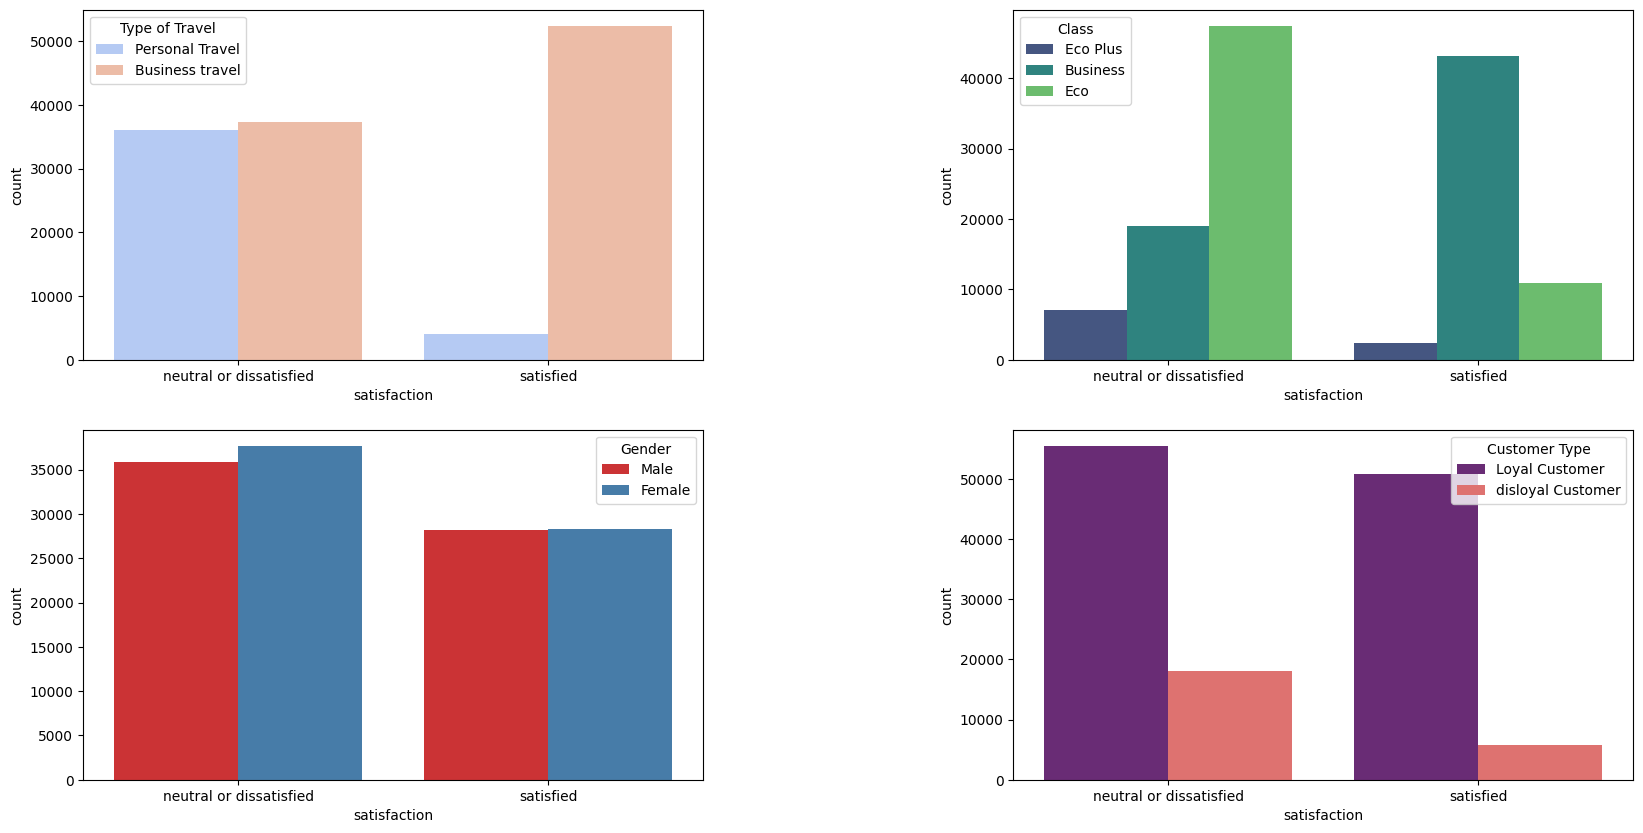

In [86]:
# Dimensioni plot
plt.figure(figsize=(20, 10))

plt.subplots_adjust(wspace=0.5)

# Primo subplot
plt.subplot(2, 2, 1)
sns.countplot(x='satisfaction', data=df, hue='Type of Travel', palette='coolwarm')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Type of Travel', borderaxespad=0.)

# Secondo subplot
plt.subplot(2, 2, 2)
sns.countplot(x='satisfaction', data=df, hue='Class', palette='viridis')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Class', borderaxespad=0.)

# Terzo subplot
plt.subplot(2, 2, 3)
sns.countplot(x='satisfaction', data=df, hue='Gender', palette='Set1')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Gender', borderaxespad=0.)

# Quarto subplot
plt.subplot(2, 2, 4)
sns.countplot(x='satisfaction', data=df, hue='Customer Type', palette='magma')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title='Customer Type', borderaxespad=0.)

plt.show()

Subplot 1: I viaggiatori di affari e personali si sono dichiarati similmente neutrali o insoddisfatti. Tuttavia, si può notare che tra i viaggiatori soddisfatti, i viaggi d'affari superano di gran lunga quelli personali. 

Subplot 2: C'è una distinta preferenza per la classe Business tra i passeggeri soddisfatti, seguita dalla classe Eco Plus. La classe ECo è quella che riscuote minor successo

Subplot 3: I dati mostrano una distribuzione quasi equa tra maschi e femmine sia nella categoria dei neutrali/insoddisfatti sia in quella dei soddisfatti.

Subplot 4: la maggior parte dei clienti soddisfatti sono clienti fedeli. Altresì anche quelli meno soddisfatti

<Axes: xlabel='Age', ylabel='Count'>

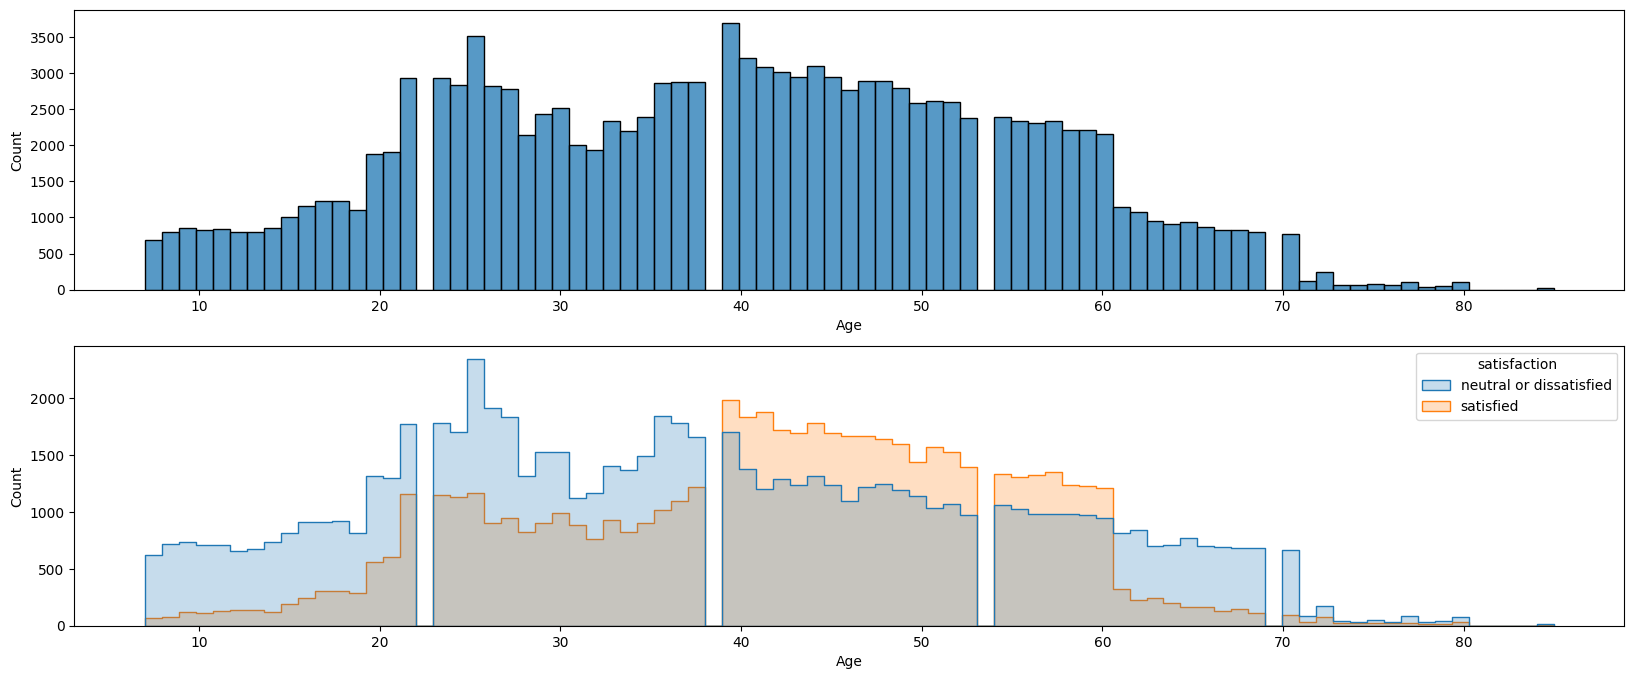

In [87]:
# Dimensioni plot
plt.figure(figsize=(20, 8))

#First plot
plt.subplot(2,1,1)
sns.histplot(x='Age', data=df)

#Second subplot
plt.subplot(2,1,2)
sns.histplot(x='Age', data=df, hue='satisfaction', element='step')

Possiamo osservare che la maggior parte dei passeggeri ha un'età compresa tra i 20 e i 60 anni, con un picco intorno ai 40 anni. Il secondo grafico è un istogramma sovrapposto che mostra la distribuzione dell'età divisa per i livelli di soddisfazione (soddisfatti vs neutrali o insoddisfatti). Qui possiamo notare che i passeggeri soddisfatti tendono ad essere distribuiti su tutto l'arco delle età, con una leggera predominanza nella fascia di età centrale (da 30 a 50 anni). I passeggeri neutrali o insoddisfatti sembrano essere più giovani, con un picco significativo nella fascia di età 20-30 anni.

In [88]:
# Creare una Crosstab
contingency_table = pd.crosstab(df['Age'], df['satisfaction'])

# Test del chi-quadrato
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}, p-value: {p}")

Chi2 Statistic: 11240.60060486876, p-value: 0.0


Poichè il valore P è 0, possiamo asserire che esista una relazione significativa tra l'età dei passeggeri e il loro livello di soddisfazione. 

Ciò significa che l'età è potenzialmente un fattore importante che contribuisce al grado di soddisfazione di un passeggero. Questa informazione potrebbe essere utile per la compagnia aerea per sviluppare strategie mirate a migliorare l'esperienza di volo per diverse fasce di età e aumentare il livello di soddisfazione complessivo dei passeggeri.

# Pre-processing

satisfaction
neutral or dissatisfied    73452
satisfied                  56428
Name: count, dtype: int64


<Axes: xlabel='satisfaction'>

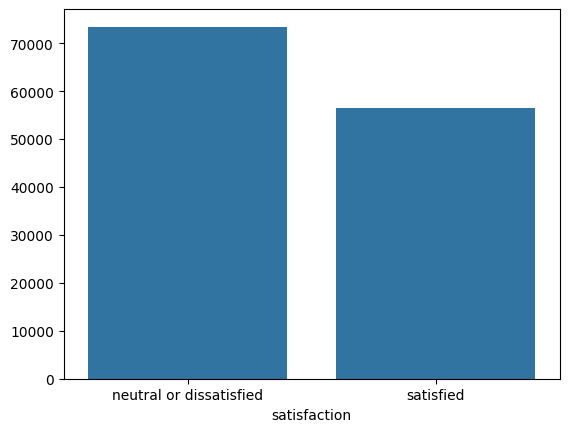

In [89]:
#Distrubizione target
class_counts = df['satisfaction'].value_counts()
print(class_counts)

sns.barplot(x=class_counts.index, y=class_counts.values)

## Label Encoding

In [90]:
#Label encoding 
satisfaction_mapping = {"satisfied": 1, "neutral or dissatisfied": 0}
df['satisfaction'] = df['satisfaction'].map(satisfaction_mapping) 

## Gender column - label encoding  
gender_mapping = {"Female": 1, "Male": 0}
df['Gender'] = df['Gender'].map(gender_mapping) 

## Customer type column - label encoding  
customer_type_mapping = {"Loyal Customer": 1, "disloyal Customer": 0}
df['Customer Type'] = df['Customer Type'].map(customer_type_mapping) 

## Type of travel column - label encoding  
travel_type_mapping = {"Business travel": 1, "Personal Travel": 0}
df['Type of Travel'] = df['Type of Travel'].map(travel_type_mapping)  

## Class column - label encoding  
class_mapping = {"Business": 3, "Eco Plus": 2, "Eco": 1}
df['Class'] = df['Class'].map(class_mapping)  

In [91]:
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,70172,0,1,13,1,2,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,0
1,1,5047,0,0,25,2,3,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,0
2,2,110028,1,1,26,2,3,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,1
3,3,24026,1,1,25,2,3,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0
4,4,119299,0,1,61,2,3,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,0,0,34,2,3,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0
25972,25972,71167,0,1,23,2,3,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,1
25973,25973,37675,1,1,17,1,1,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0
25974,25974,90086,0,1,14,2,3,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,1


## features selection -> primo approccio: correlazioni  

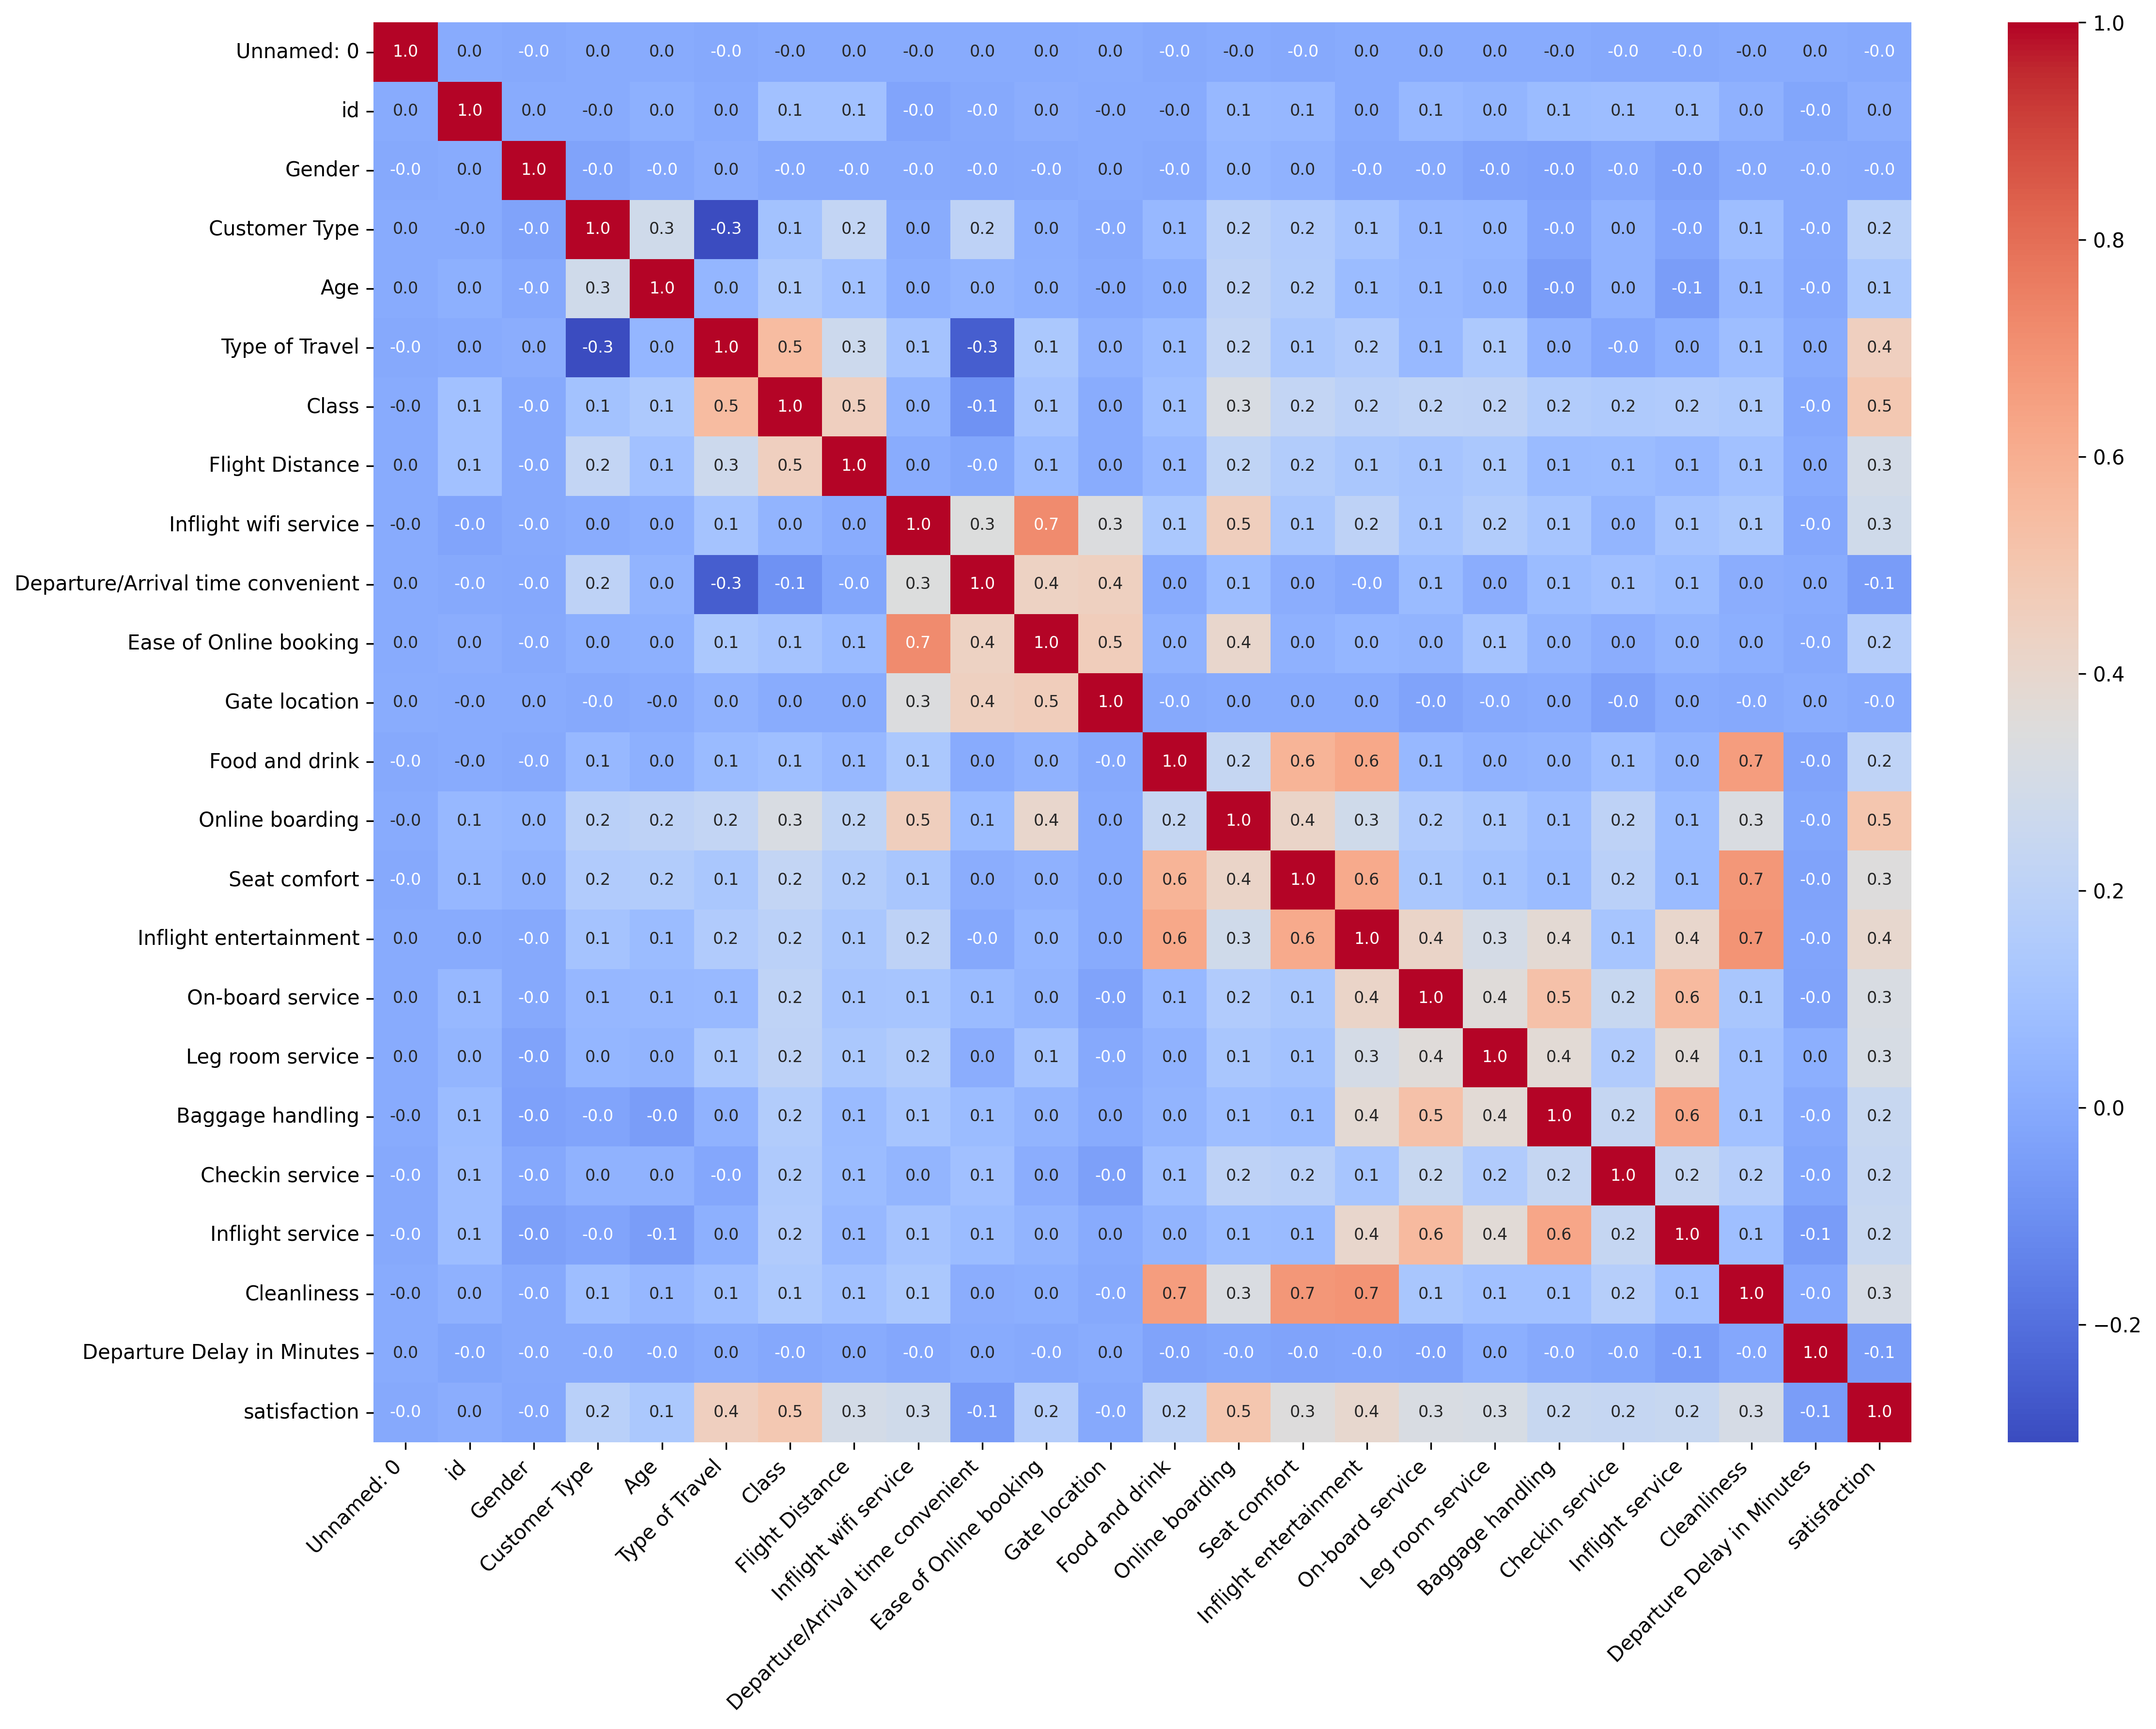

In [92]:
plt.figure(figsize=(16,12), dpi=300)  # Aumenta la dimensione e la risoluzione
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', size=10)  # Ruota le etichette dell'asse x per leggibilità
plt.yticks(size=10)  # Aumenta la dimensione del font per le etichette dell'asse y
plt.tight_layout()  # Ajusta la disposizione
plt.show()

Perche non ho usato queste features e non ho applicato lo caling:

Age --> 

Flight 

Perche ho scelto queste features ... 

Inflight entertainment: Forte correlazione positiva con la soddisfazione.
Seat comfort (o Cleanliness): Scegliere una a causa della loro alta correlazione per evitare la multicollinearità.
Online boarding: Moderata correlazione positiva.
Leg room service: Moderata correlazione positiva.
On-board service: Moderata correlazione positiva.
Baggage handling: Moderata correlazione positiva.
Checkin service: Moderata correlazione positiva.
Class (o Type of Travel): entrambe hanno una moderata correlaazione con il target. Class dà un po' più di informazioni. Capiamo però la loro distribuzione (meglio quello con le classi meglio distribuite)Moderata correlazione positiva.

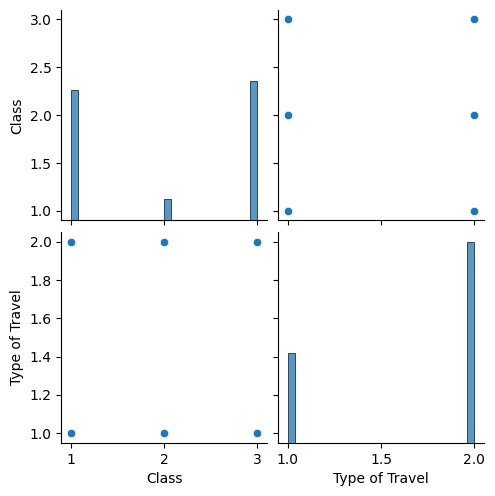

In [93]:
distribution_Class_or_typeoftravel = sns.pairplot(df[["Class", "Type of Travel"]])
distribution_Class_or_typeoftravel

In [94]:
#Prima Screamtura DataFrame
# df = df[["Leg room service", "Inflight entertainment", "Online boarding", "Class", "Type of Travel", "On-board service", "Inflight service", "satisfaction"]]

#Seconda scrematura Dataframe
df = df[["Leg room service", "Inflight entertainment", "Online boarding", "Checkin service", "Type of Travel", "On-board service", "Inflight service", "satisfaction"]]
df

,Leg room service,Inflight entertainment,Online boarding,Checkin service,Type of Travel,On-board service,Inflight service,satisfaction
0,3,5,3,4,1,4,5,0
1,5,1,3,1,2,1,4,0
2,3,5,5,4,2,4,4,1
3,5,2,2,1,2,2,4,0
4,4,3,5,3,2,3,3,1
...,...,...,...,...,...,...,...,...
25971,2,4,3,4,2,3,5,0
25972,5,4,4,5,2,4,5,1
25973,3,2,1,5,1,4,4,0
25974,2,4,4,4,2,3,5,1


In [95]:
y = df["satisfaction"]
X = df[["Leg room service", "Inflight entertainment", "Online boarding", "Checkin service", "Type of Travel", "On-board service", "Inflight service"]]

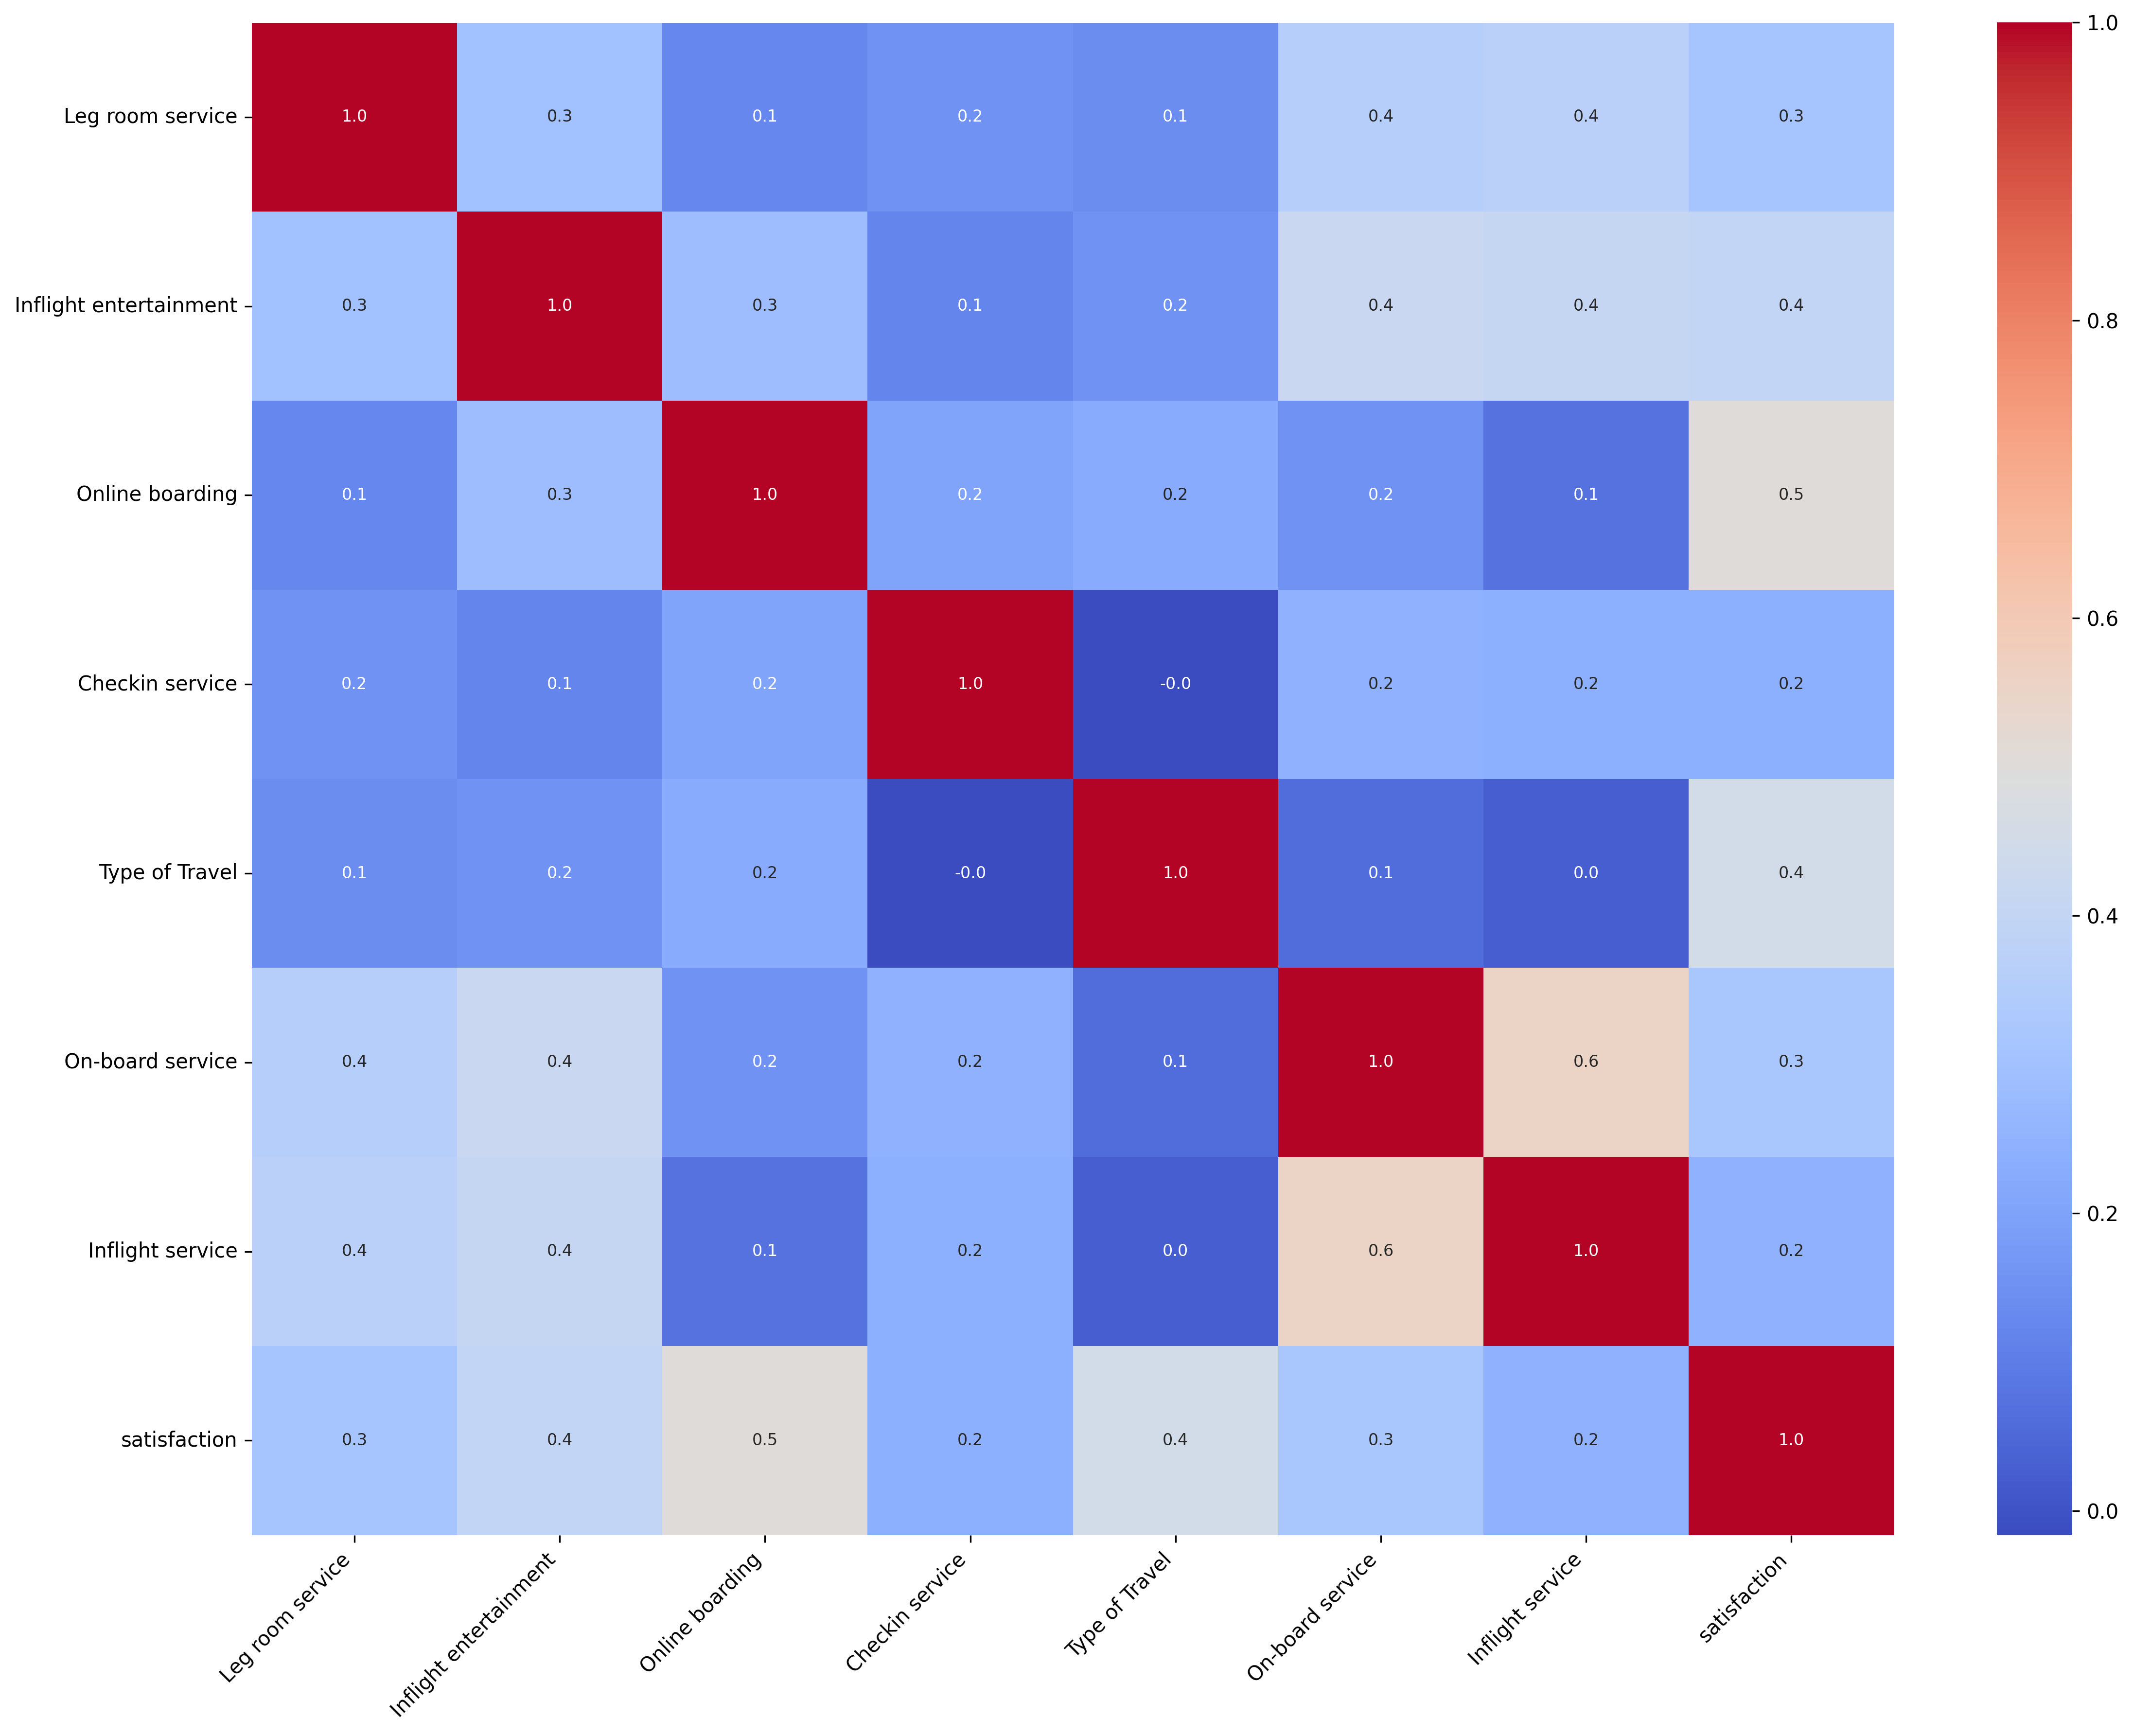

In [96]:
plt.figure(figsize=(16,12), dpi=300)  # Aumenta la dimensione e la risoluzione
heatmap = sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".1f", annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', size=10)  # Ruota le etichette dell'asse x per leggibilità
plt.yticks(size=10)  # Aumenta la dimensione del font per le etichette dell'asse y
plt.tight_layout()  # Aggiustare la disposizione
plt.show()

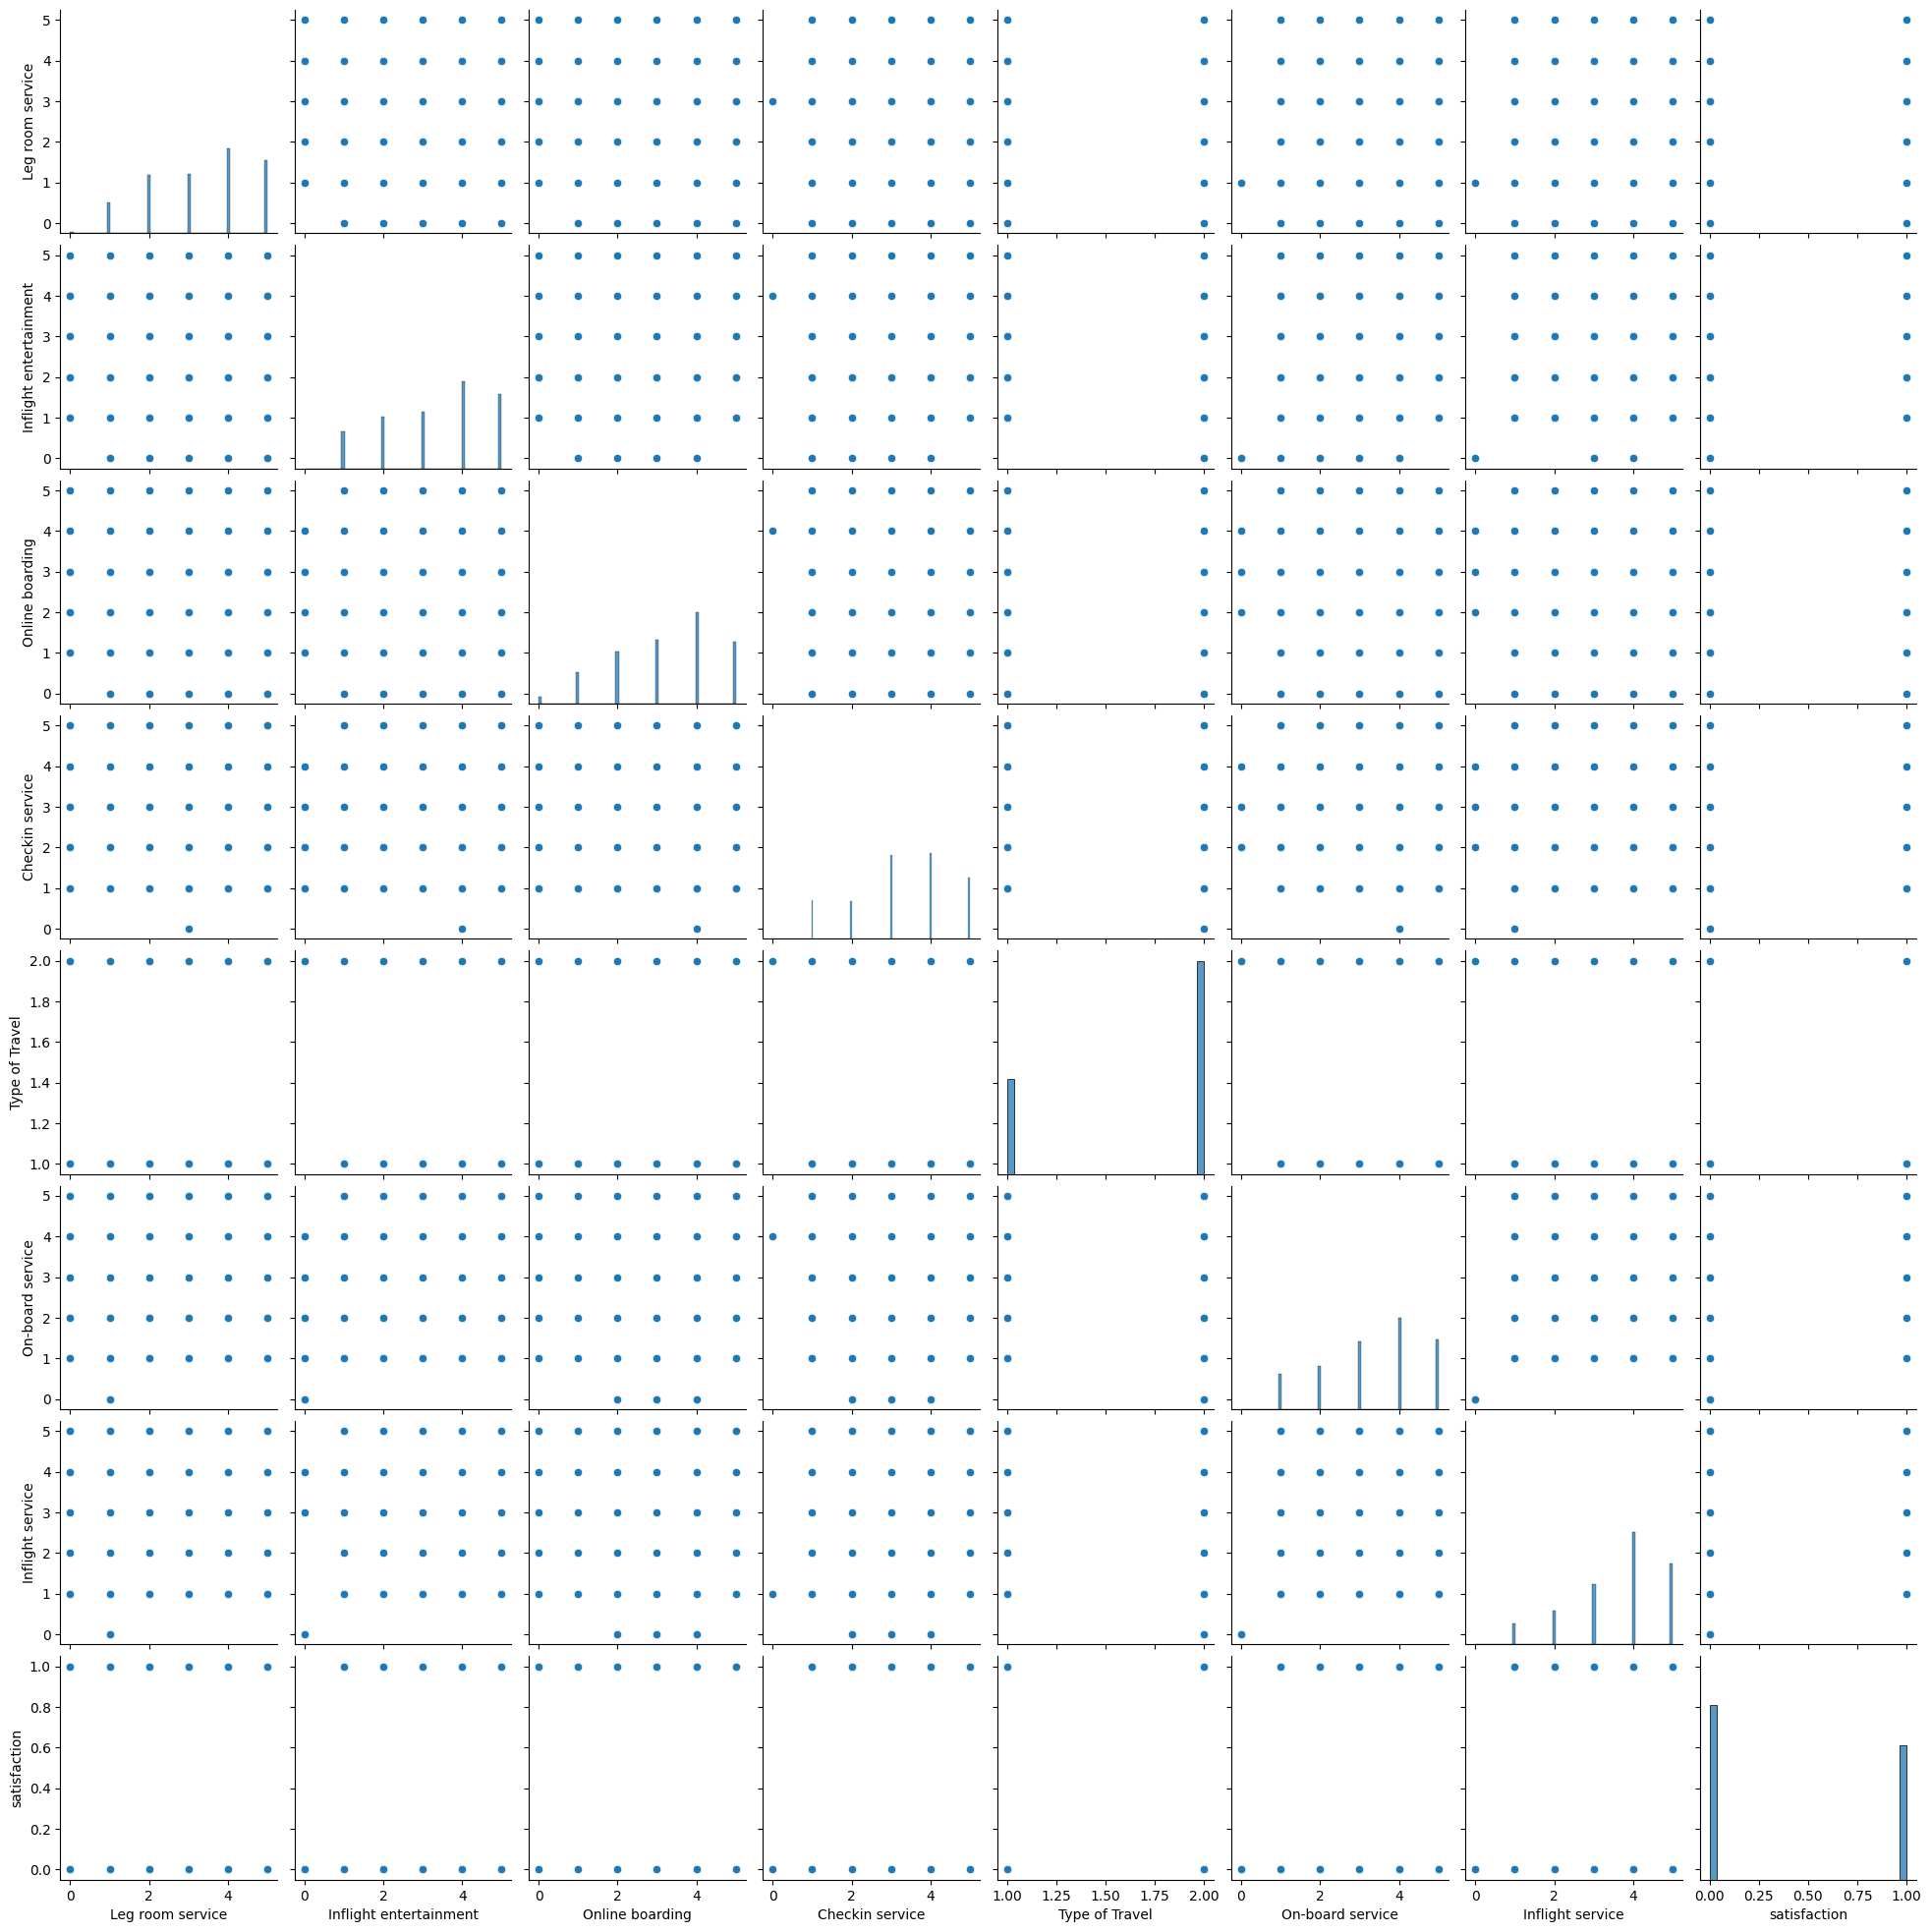

In [97]:
sns.pairplot(df)

In [98]:
# Prova con la convarianza!



# Processing

In [99]:
train_test = StratifiedShuffleSplit(test_size = 0.2, n_splits = 1, random_state = 42)

for train_index, test_index in train_test.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [100]:
#Valutiamo la distribuzione tra Train e Test

#Per valutare distribuzione
np.bincount(y_train)/len(y_train), np.bincount(y_test)/len(y_test)

(array([0.56554127, 0.43445873]), array([0.56552202, 0.43447798]))

In [101]:
#Fai una grid search di xgb! 

# Definire il modello XGBoost
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Definire la griglia di parametri
param_grid = {
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Impostare GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)

# Adattare il modello
grid_search.fit(X_train, y_train)

# Migliori parametri e punteggio
print("Migliori parametri:", grid_search.best_params_)
print("Miglior punteggio:", grid_search.best_score_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.848 total time=   0.3s
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.842 total time=   0.2s
[CV 3/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100;, score=0.844 total time=   0.2s
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.878 total time=   0.6s
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.876 total time=   0.5s
[CV 3/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200;, score=0.878 total time=   0.5s
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=300;, score=0.881 total time=   0.7s
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_

eval_metric in XGBoost è utilizzato per guidare l'addestramento del modello, mentre scoring in GridSearchCV è utilizzato per selezionare il miglior modello dalla griglia.

In [112]:
# Creazione di un modello XGBoost
model = xgb.XGBClassifier(objective='binary:logistic', gamma=0.5, learning_rate=0.2, max_depth=5, min_child_weight=10, n_estimators=100, random_state=42)

In [113]:
# Addestramento del modello
model.fit(X_train, y_train)

# Predizione sui dati di test
predictions = model.predict(X_test)

In [104]:
#Score cross validation_score! 

In [114]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     14690
           1       0.90      0.85      0.88     11286

    accuracy                           0.90     25976
   macro avg       0.90      0.89      0.89     25976
weighted avg       0.90      0.90      0.90     25976



True Positive: 0.37107329842931935
False Positive: 0.03980597474591931
True Negative: 0.5257160455805359
False Negative: 0.06340468124422544


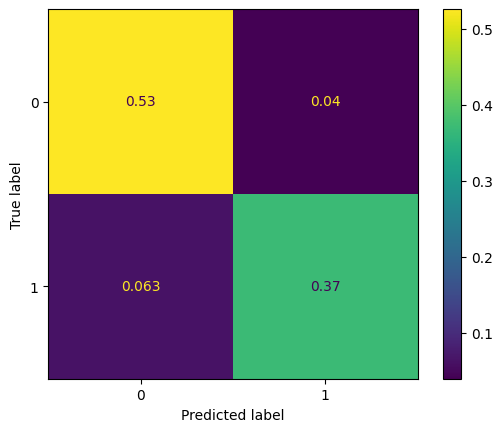

In [115]:
# Calcola la matrice di confusione
cm = confusion_matrix(y_test, predictions, normalize='all')

# Usa ravel per estrarre TP, FP, TN, FN
tn, fp, fn, tp = cm.ravel()

print(f"True Positive: {tp}")
print(f"False Positive: {fp}")
print(f"True Negative: {tn}")
print(f"False Negative: {fn}")

# Visualizza la matrice di confusione
ConfusionMatrixDisplay(cm).plot()

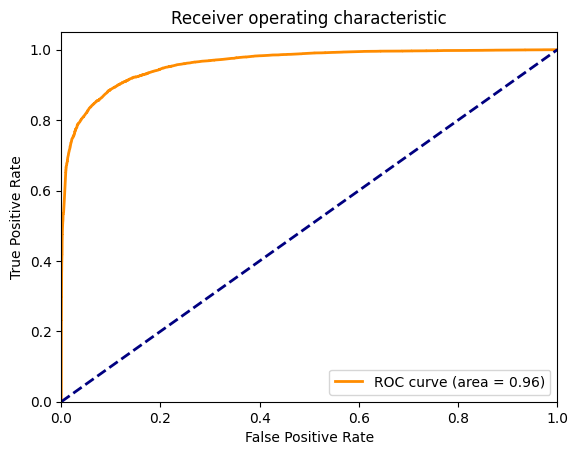

In [107]:
# Curva ROC e AUC 
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

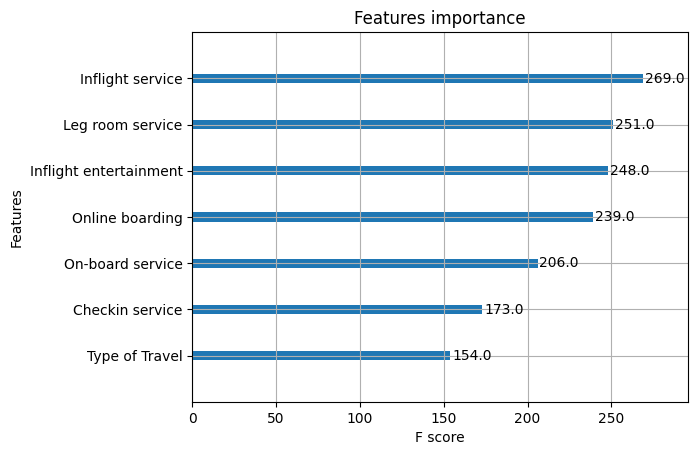

In [108]:
# Importanza delle Features
xgb.plot_importance(model)
plt.title('Features importance')
plt.show()

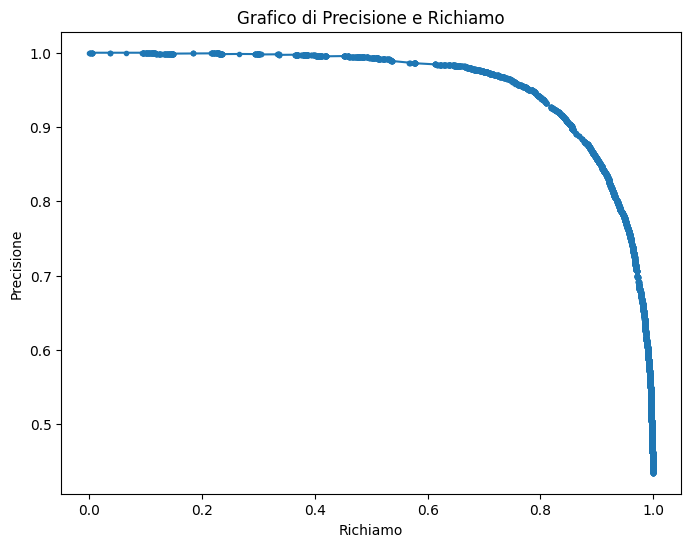

In [109]:
# Calcolare precisione e richiamo
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])

# Creare il grafico di precisione e richiamo
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Grafico di Precisione e Richiamo')
plt.xlabel('Richiamo')
plt.ylabel('Precisione')
plt.show()


In [110]:
#Fai una visualizzazione con la PCA!

In [111]:
# Crea un DataFrame basato su X_test
#X_test_with_predictions = X_test.copy()

# Aggiungi la colonna del target originale (y_test)
#X_test_with_predictions['actual_satisfaction'] = y_test.values

# Aggiungi la colonna delle previsioni del modello
#X_test_with_predictions['predicted_satisfaction'] = predictions

# Mostra il nuovo DataFrame
#X_test_with_predictions